In [16]:
using DecisionTree
using Random, Statistics

In [17]:
# load data

X, y = load_data("iris")

# view data types

X

y

# cast data types

X = float.(X)

y = string.(y)

iris = [X y];

In [18]:
# define function to split data (source: Huda Nassar)

function perclass_splits(y, percent)
    uniq_class = unique(y)
    keep_index = []
    for class in uniq_class
        class_index = findall(y .== class)
        row_index = randsubseq(class_index, percent)
        push!(keep_index, row_index...)
    end
    return keep_index
end

perclass_splits (generic function with 1 method)

In [19]:
# split data between train and test

Random.seed!(1)

train_index = perclass_splits(y, 0.67)

test_index = setdiff(1:length(y), train_index)

# split features

X_train = X[train_index, :]

X_test = X[test_index, :]

# split classes

y_train = y[train_index]

y_test = y[test_index];

In [21]:
################################################################################
# AdaBoost (boosting)
################################################################################

# run model

model = AdaBoostStumpClassifier(n_iterations = 20)

fit!(model, X_train, y_train)

AdaBoostStumpClassifier
n_iterations: 20
classes:      ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
ensemble:     Ensemble of Decision Trees
Trees:      20
Avg Leaves: 2.0
Avg Depth:  1.0

In [23]:
# make predictions

ŷ = predict(model, X_test);  # type y\hat <tab>


In [6]:
# check accuracy

accuracy = mean(ŷ .== y_test)

0.9464285714285714

In [7]:
using EvalMetrics

In [8]:
# display confusion matrix

cm = confusion_matrix(y_test, ŷ)



LoadError: UndefVarError: `confusion_matrix` not defined

In [9]:
using PrettyTables

In [10]:
header = ["Column 1", "Column 2", "Column 3"];

In [11]:
# display results

check = [ŷ[i] == y_test[i] for i in 1:length(ŷ)]

check_display = [ŷ y_test check];

In [12]:
@pt :header =header check_display

┌─────────────────┬─────────────────┬──────────┐
│        Column 1 │        Column 2 │ Column 3 │
├─────────────────┼─────────────────┼──────────┤
│     Iris-setosa │     Iris-setosa │     true │
│     Iris-setosa │     Iris-setosa │     true │
│     Iris-setosa │     Iris-setosa │     true │
│     Iris-setosa │     Iris-setosa │     true │
│     Iris-setosa │     Iris-setosa │     true │
│     Iris-setosa │     Iris-setosa │     true │
│     Iris-setosa │     Iris-setosa │     true │
│     Iris-setosa │     Iris-setosa │     true │
│     Iris-setosa │     Iris-setosa │     true │
│     Iris-setosa │     Iris-setosa │     true │
│     Iris-setosa │     Iris-setosa │     true │
│     Iris-setosa │     Iris-setosa │     true │
│     Iris-setosa │     Iris-setosa │     true │
│     Iris-setosa │     Iris-setosa │     true │
│     Iris-setosa │     Iris-setosa │     true │
│ Iris-versicolor │ Iris-versicolor │     true │
│ Iris-versicolor │ Iris-versicolor │     true │
│ Iris-versicolor │ 

In [13]:
using Plots

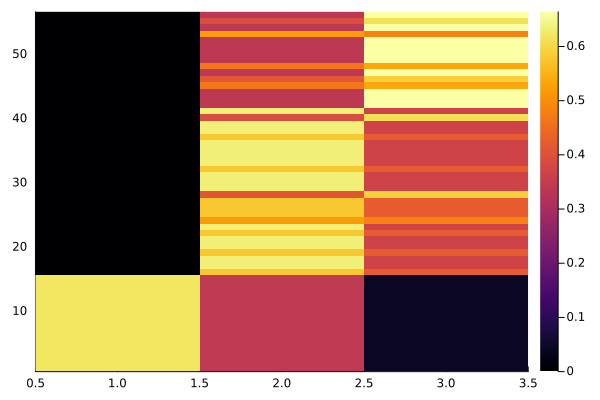

In [14]:
# display probability of each prediction

prob = predict_proba(model, X_test);
heatmap(prob)